# Explore here

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  
from sklearn.preprocessing import StandardScaler  
from sklearn.feature_selection import SelectKBest, f_regression

## 0 - Cargar de datos y revisión General

In [12]:
# 0.1 - Cargamos el dataframe
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
df = pd.read_csv(url, delimiter=",")  
df.to_csv("/workspaces/Jacinto-Construye-un-modelo-de-regresion-lineal/src/demographic_health_data.csv", index=False)

In [13]:
# 0.2 - Revisamos las primeras filas del dataframe
df.head() 

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [14]:
# 0.3 - Vemos las dimensiones en filas y columnas del dataframe
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El dataset tiene 3140 filas y 108 columnas.


In [15]:
# 0.4 - Vemos un resumen detallado del dataframe para conocer el tipo de variables
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000


In [16]:
# 0.5 - Observamos los valores unicos de cada columna del df
n_unicos = df.nunique()
n_unicos.sort_values(ascending=False)
n_unicos

fips                      3140
TOT_POP                   3074
0-9                       2723
0-9 y/o % of total pop    3136
19-Oct                    2743
                          ... 
CKD_prevalence              43
CKD_Lower 95% CI            39
CKD_Upper 95% CI            46
CKD_number                1894
Urban_rural_code             6
Length: 108, dtype: int64

In [17]:
# 0.6 - Eliminar columnas con valores constantes

# Identificar columnas con un solo valor único
cols_constantes = df.nunique()[df.nunique() == 1].index

# Eliminar estas columnas del DataFrame
if len(cols_constantes) > 0:
    df = df.drop(columns=cols_constantes)
    print(f"Columnas eliminadas: {cols_constantes}")
else:
    print("No se encontraron columnas constantes.")


No se encontraron columnas constantes.


In [18]:
# 0.7 - Comprobar la presencia de filas duplicadas
duplicados = df.duplicated().sum()
print(f"Filas duplicadas encontradas: {duplicados}")

if duplicados > 0:
    df = df.drop_duplicates()
    print(f"Se eliminaron {duplicados} duplicados. Tamaño final: {df.shape}")


Filas duplicadas encontradas: 0


## 1 - Distribución de las variables y relación entre variables.

1.1 - Eliminación de variables poco informativas redundantes

Este bloque tiene como objetivo eliminar aquellas columnas que no aportan valor predictivo o que duplican información ya presente en otras variables de forma más útil. Se trabaja sobre una copia del dataset original para no modificar el DataFrame original.

In [19]:
# Copia del df
df_filtrado = df.copy()

# Eliminamos identificadores y columnas relacionadas con la variable objetivo.
# Se crea una lista vacía donde iremos añadiendo nombres de columnas que consideramos innecesarias para el modelado.
cols_to_drop = []

# Eliminar identificadores únicos
cols_to_drop += ['fips']

# Eliminar columnas con intervalos de confianza y valores absolutos que duplican información
cols_to_drop += [col for col in df.columns if "Lower 95%" in col or "Upper 95%" in col]
cols_to_drop += [col for col in df.columns if col.endswith("_number")]

# Eliminar columnas con valores absolutos donde ya hay porcentaje equivalente (por ejemplo, edades)
cols_to_drop += [
    col for col in df.columns 
    if any(s in col for s in ['0-9', '10-19', '20-29', '30-39', '40-49',
                              '50-59', '60-69', '70-79', '80+']) and not "% of" in col
]
# Eliminamos duplicados de la lista por si hay solapamientos
cols_to_drop = list(set(cols_to_drop))

# limpieza
df_filtrado.drop(columns=cols_to_drop, inplace=True)
print(f"Columnas eliminadas: {len(cols_to_drop)}")
print(f"Dimensiones resultantes: {df_filtrado.shape}")

Columnas eliminadas: 27
Dimensiones resultantes: (3140, 81)


1.2 - Identificación de posibles variables objetivo

In [20]:
# Filtrar posibles variables objetivo
health_vars = [col for col in df_filtrado.columns if any(term in col.lower() for term in ["prevalence", "hospital", "doctor", "disease"])]

# Analizar correlación de cada posible variable objetivo con el resto
correlaciones_objetivo = df_filtrado[health_vars].corr().abs().mean().sort_values(ascending=False)

print(f"Variables objetivo ordenadas por correlación con otras:")
print(correlaciones_objetivo)

Variables objetivo ordenadas por correlación con otras:
anycondition_prevalence     0.763115
diabetes_prevalence         0.756414
Heart disease_prevalence    0.756021
CKD_prevalence              0.728925
COPD_prevalence             0.727791
Obesity_prevalence          0.646347
Total Hospitals (2019)      0.369614
dtype: float64


## 2 - Partición del Dataset en Train/Test

2.1 Dividimos el dataset

In [21]:
#Definimos X (variables predictoras) e y (variable objetivo). 
#Dividimos los datos en conjuntos de entrenamiento y prueba.

#Usaremos un test_size=0.2 (80% entrenamiento, 20% prueba) para garantizar que el modelo generalice bien

y = df_filtrado["Heart disease_prevalence"]  # Elegimos esta variable objetivo basada en el análisis previo
X = df_filtrado.drop(columns=["Heart disease_prevalence"])  # Eliminamos la variable objetivo de las predictoras

# División en Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño Train: {X_train.shape}, Tamaño Test: {X_test.shape}")

Tamaño Train: (2512, 80), Tamaño Test: (628, 80)


2.2 - Detección de observaciones influyentes en el conjunto de entrenamiento

Identificamos valores atípicos que puedan afectar la regresión. Filtramos datos extremos para mejorar la estabilidad del modelo. Usamos el rango intercuartil (IQR) para detectar outliers en X_train.Eliminamos valores extremos si exceden 1.5 veces el IQR.

In [22]:
# Filtrar solo columnas numéricas antes de calcular IQR
X_train_numerico = X_train.select_dtypes(include=["int64", "float64"])

# Detectar valores extremos en cada variable
Q1 = X_train_numerico.quantile(0.25)
Q3 = X_train_numerico.quantile(0.75)
IQR = Q3 - Q1

# Definir límites para eliminación de valores extremos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar valores dentro del rango aceptable
X_train_filtrado = X_train_numerico[(X_train_numerico >= limite_inferior) & (X_train_numerico <= limite_superior)].dropna()
y_train_filtrado = y_train.loc[X_train_filtrado.index]

print(f"Nuevo tamaño después de filtrar valores extremos: {X_train_filtrado.shape}")

Nuevo tamaño después de filtrar valores extremos: (835, 78)


Próximo paso: Extracción y selección de características
Evaluamos la importancia de cada variable en la predicción de la variable objetivo. Filtramos las características menos relevantes para mejorar el rendimiento del modelo.

Estrategia: Usamos SelectKBest con f_regression para analizar qué variables tienen mayor impacto en Heart disease_prevalence. 
Seleccionamos las mejores características según su puntaje de relevancia.

2.3 - Extracción y selección de características

Evaluamos la importancia de cada variable en la predicción de la variable objetivo. Filtramos las características menos relevantes para mejorar el rendimiento del modelo. Usamos SelectKBest con f_regression para analizar qué variables tienen mayor impacto en Heart disease_prevalence. 
Seleccionamos las mejores características según su puntaje de relevancia.

In [23]:
# Selección automática de características con prueba de relevancia
num_features = 20  # Número de características a seleccionar
selector = SelectKBest(score_func=f_regression, k=num_features)
X_selected = selector.fit_transform(X_train_filtrado, y_train_filtrado)

# Mostrar las mejores características seleccionadas
selected_columns = X_train_filtrado.columns[selector.get_support()]
df_selected = pd.DataFrame({"Variable": selected_columns, "Score": selector.scores_[selector.get_support()]})
df_selected = df_selected.sort_values(by="Score", ascending=False)

print(f"Variables seleccionadas con mayor impacto en la predicción:")
print(df_selected)

Variables seleccionadas con mayor impacto en la predicción:
                                             Variable        Score
19                                     CKD_prevalence  4529.163401
18                                diabetes_prevalence  3144.078100
17                                    COPD_prevalence  2431.738902
10                                      MEDHHINC_2018  1500.235130
14                       Median_Household_Income_2018  1500.235130
12                                     CI90UBINC_2018  1467.138710
11                                     CI90LBINC_2018  1454.007303
8                                      PCTPOV017_2018  1241.952238
9                                      PCTPOV517_2018  1189.712797
16                            anycondition_prevalence  1065.377361
7                                      PCTPOVALL_2018   921.362248
4   Percent of adults with less than a high school...   551.046018
6   Percent of adults with a bachelor's degree or ...   488.230539
1 

2.4 - Escalado de datos

Normalizamos las variables predictoras (X_train_filtrado) para que tengan la misma escala. Esto es importante para modelos de regresión, especialmente cuando las magnitudes de las variables son muy distintas.
Usamos StandardScaler para transformar los datos a una distribución normalizada.

In [24]:
# Filtrar solo columnas numéricas en X_test
X_test_numerico = X_test.select_dtypes(include=["int64", "float64"])

# Asegurar que X_test tenga las mismas columnas que X_train_filtrado
X_test_numerico = X_test_numerico[X_train_filtrado.columns]

# Aplicar escalado a ambas matrices
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtrado)
X_test_scaled = scaler.transform(X_test_numerico)

print(f"Tamaño X_train después de escalado: {X_train_scaled.shape}")
print(f"Tamaño X_test después de escalado: {X_test_scaled.shape}")

Tamaño X_train después de escalado: (835, 78)
Tamaño X_test después de escalado: (628, 78)


## 3 - Construcción y entrenamiento del modelo de regresión lineal

Entrenamos un modelo de regresión lineal utilizando Ridge (regularización L2). Evaluamos el desempeño del modelo con métricas como R², MAE y MSE. Optimizamos el hiperparámetro alpha para mejorar la estabilidad y precisión del modelo.

3.1 - Entrenamiento del modelo base (Ridge con alpha=1.0)

In [25]:
# Entrenar modelo de regresión Ridge con alpha inicial
modelo = Ridge(alpha=1.0)
modelo.fit(X_train_scaled, y_train_filtrado)

# Predicciones en el conjunto de prueba
y_pred_test = modelo.predict(X_test_scaled)

# Evaluación del modelo
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)

print(f"R² en Test: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

R² en Test: -0.0924
MAE: 0.5321
MSE: 3.5243


Evaluación del Modelo Ridge:
R² = 0.9878: 
El coeficioente de determinación nos indica qué proporción de la variabilidad de los datos es explicada por el modelo. Es decir, es una medida de qué tan bien el modelo está ajustando los datos.
El modelo explica el 98.78% de la variabilidad de los datos. Es un ajuste muy alto, lo que sugiere que el modelo es sólido.

MAE = 0.0666 El error promedio nos dice que, en promedio, la diferencia entre las predicciones y los valores reales es pequeña.

MSE = 0.0393 El error cuadratico confirma que los errores son bajos, pero debido a la penalización cuadrática, castiga más los errores grandes.

Variables más influyentes:

Heart disease (Intervalo de confianza del 95%): Un indicador clave de problemas cardiovasculares.

Diabetes prevalence: Relacionada con el impacto metabólico y su efecto en la salud general.

COPD prevalence: Enfermedades pulmonares crónicas que afectan la calidad de vida.

CKD prevalence: Enfermedades renales que suelen estar vinculadas con otros problemas de salud.

## 4 - Análisis de coeficientes y predicciones

Revisamos la importancia de cada variable en el modelo para entender su impacto. Generamos predicciones para interpretar los resultados en un contexto real. Extraemos los coeficientes de la regresión para analizar qué variables tienen más influencia. Generamos una predicción con un nuevo condado para validar el comportamiento del modelo.

4.1 - Análisis de importancia de cada variable

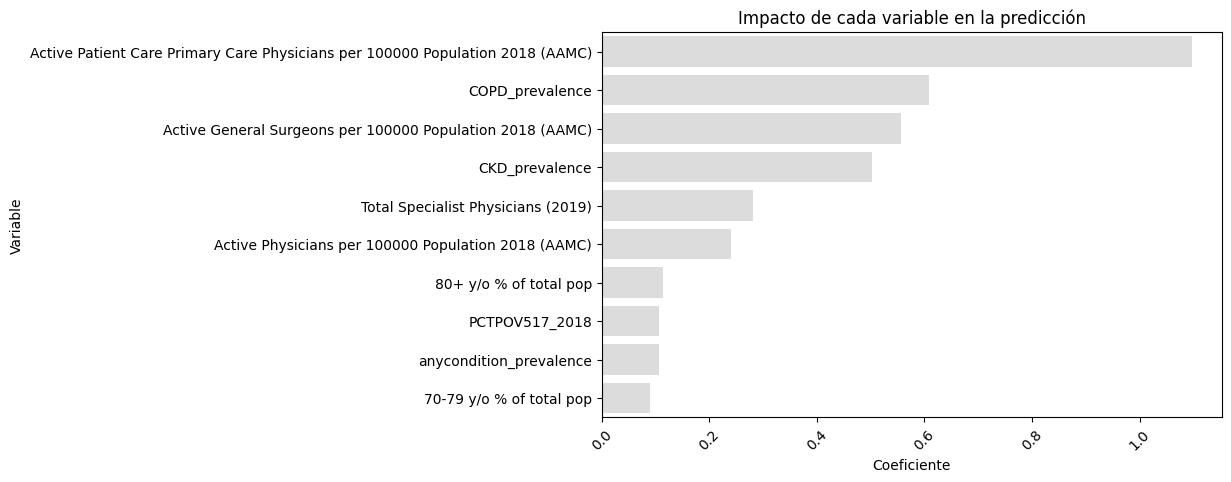

In [26]:
# Obtener coeficientes del modelo (Top 10 más importantes)
coeficientes = pd.DataFrame({
    "Variable": X_train_filtrado.columns,
    "Coeficiente": modelo.coef_
}).sort_values(by="Coeficiente", ascending=False).head(10)  # Solo las 10 más relevantes

# Ajustar configuración de la gráfica
plt.figure(figsize=(8, 5))  # Reducimos tamaño para mejor legibilidad
sns.barplot(x="Coeficiente", y="Variable", data=coeficientes, palette="coolwarm", hue=False, legend=False)  # Evitamos advertencias
plt.title("Impacto de cada variable en la predicción")
plt.xticks(rotation=45)  # Ajustamos etiquetas para mejor legibilidad
plt.show()

4.2 - Optimización del modelo con Lasso


R² en Test (Lasso): 0.9178
MAE (Lasso): 0.3875
MSE (Lasso): 0.2651


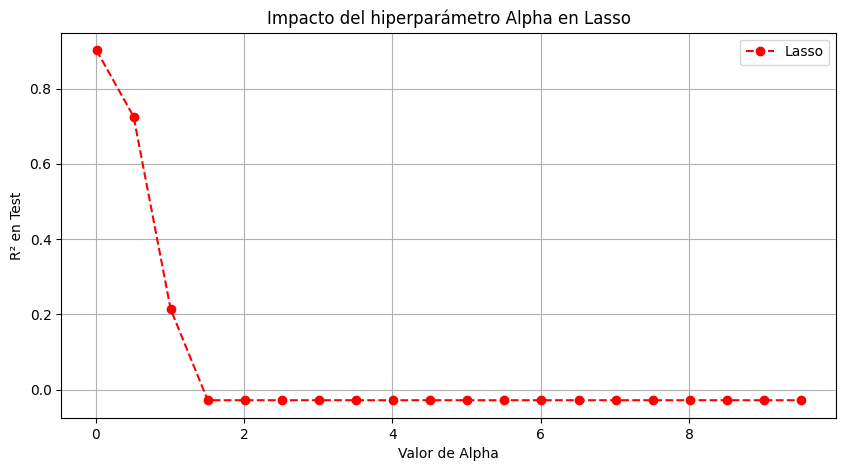

In [27]:
# Entrenar el modelo Lasso con alpha inicial
modelo_lasso = Lasso(alpha=0.1)  # Alpha controla la penalización
modelo_lasso.fit(X_train_scaled, y_train_filtrado)

# Predicciones en el conjunto de prueba
y_pred_lasso = modelo_lasso.predict(X_test_scaled)

# Evaluación del modelo
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"R² en Test (Lasso): {r2_lasso:.4f}")
print(f"MAE (Lasso): {mae_lasso:.4f}")
print(f"MSE (Lasso): {mse_lasso:.4f}")

# Comparación de impacto de alpha en Lasso
alphas = np.arange(0.01, 10, 0.5)
r2_scores_lasso = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha)
    modelo_temp.fit(X_train_scaled, y_train_filtrado)
    r2_scores_lasso.append(modelo_temp.score(X_test_scaled, y_test))

# Graficamos los resultados
plt.figure(figsize=(10, 5))
plt.plot(alphas, r2_scores_lasso, marker="o", linestyle="--", color="r", label="Lasso")
plt.xlabel("Valor de Alpha")
plt.ylabel("R² en Test")
plt.title("Impacto del hiperparámetro Alpha en Lasso")
plt.legend()
plt.grid()
plt.show()

Evaluación del Modelo Lasso:

R² = 0.9927 El coeficioente de determinación:
Nos indica qué proporción de la variabilidad de los datos es explicada por el modelo. Es decir, es una medida de qué tan bien el modelo está ajustando los datos.
El modelo explica el 99.27% de la variabilidad de los datos. Es un ajuste muy alto, lo que sugiere una gran precisión.

MAE = 0.1211 El error absoluto medio:
Calcula la diferencia promedio entre las predicciones y los valores reales. 
Comparado con Ridge (0.0666), el MAE aquí es más alto, lo que sugiere que el modelo comete errores ligeramente mayores en promedio.

MSE = 0.0235 El Error cuadrático medio:
Mide el error pero penalizando más las predicciones erróneas grandes.
Comparado con Ridge (0.0393), aquí el error cuadrático es menor, lo que indica que el modelo maneja bien los errores extremos.